## Computation ACME-Pandas 2 


* #### August 1, 2019
* #### SP Tian 

In [1]:
# Import packages and set up 

import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
%matplotlib inline 

## 7. Pandas I: Introduction 

### Problem 6 

Each row represents a different passenger, and the columns describe various features of the passengers (age, sex, whether or not they survived, etc.)

In [24]:
titanic = pd.read_csv("titanic.csv", index_col = None
                      , header = 0, sep = ",")
titanic = titanic.drop(columns = ["Sibsp", "Parch", "Cabin"
                                  , "Boat", "Body", "home.dest"])
titanic = titanic.dropna(subset = ["Survived"])
titanic.loc[titanic["Survived"] == 1, "Survived"] = True 
titanic.loc[titanic["Survived"] == 0, "Survived"] = False 
age_avg = titanic["Age"].mean()

# Or equivalently, titanic["Age"] = titanic["Age"].fillna(averageAge) 
agecond = titanic.Age.isnull()
titanic.loc[agecond, "Age"] = age_avg 

titanic_clean = titanic.copy() 
titanic_clean.to_csv("titanic_clean.csv") 
titanic_clean

,Pclass,Survived,Name,Sex,Age,Ticket,Fare,Embarked
0,1.0,True,"Allen, Miss. Elisabeth Walton",female,29.000000,24160,211.3375,S
1,1.0,True,"Allison, Master. Hudson Trevor",male,0.916700,113781,151.5500,S
2,1.0,False,"Allison, Miss. Helen Loraine",female,2.000000,113781,151.5500,S
3,1.0,False,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,113781,151.5500,S
4,1.0,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,113781,151.5500,S
5,1.0,True,"Anderson, Mr. Harry",male,48.000000,19952,26.5500,S
6,1.0,True,"Andrews, Miss. Kornelia Theodosia",female,63.000000,13502,77.9583,S
7,1.0,False,"Andrews, Mr. Thomas Jr",male,39.000000,112050,0.0000,S
8,1.0,True,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,11769,51.4792,S
9,1.0,False,"Artagaveytia, Mr. Ramon",male,71.000000,PC 17609,49.5042,C


In [42]:
print(len(titanic_clean[titanic_clean["Survived"] == True]), "people survived.")
print(str(500/titanic_clean.shape[0]), "of total passengers survived.")

500 people survived.
0.3819709702062643 of total passengers survived.


In [43]:
print("Avg price of ticket: ", titanic_clean.Fare.mean())
print("Most expensive ticket: ", titanic_clean.Fare.max())

oldestSurvivor = np.max(titanic_clean["Age"].where(titanic_clean["Survived"] == True))
youngestSurvivor = np.min(titanic_clean["Age"].where(titanic_clean["Survived"] == True))
oldestDead = np.max(titanic_clean["Age"].where(titanic_clean["Survived"] == False))
youngestDead = np.min(titanic_clean["Age"].where(titanic_clean["Survived"] == False))
print("\t")
print("Oldest survivor age: ", oldestSurvivor)
print("Youngest survivor age: ", youngestSurvivor)
print("Oldest Died age: ", oldestDead)
print("Youngest Died age: ", youngestDead)

Avg price of ticket:  33.29547928134572
Most expensive ticket:  512.3292
	
Oldest survivor age:  80.0
Youngest survivor age:  0.1667
Oldest Died age:  74.0
Youngest Died age:  0.3333


## 8. Pandas II: Plotting  

### Problem 1 

* plot(kind="") 
* hist
* pd.plotting.scatter_matrix()
* box
* hexbin 
* line 
* bar and barh/hbar 

Include title, axis labels specifying units, legend, the source in each visualization. 

In [48]:
from pydataset import data 

# Call data() to see the entire list of data sets. 
# To load a particular data set, enter its ID as an argument to data(). 
titanic = data('Titanic')
# To see the information about a data set, call data() with show_doc=True. 
data("Titanic", show_doc = True)

initiated datasets repo at: /Users/apple/.pydataset/
Titanic

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Survival of passengers on the Titanic

### Description

This data set provides information on the fate of passengers on the fatal
maiden voyage of the ocean liner ‘Titanic’, summarized according to economic
status (class), sex, age and survival.

### Usage

    Titanic

### Format

A 4-dimensional array resulting from cross-tabulating 2201 observations on 4
variables. The variables and their levels are as follows:

No

Name

Levels

1

Class

1st, 2nd, 3rd, Crew

2

Sex

Male, Female

3

Age

Child, Adult

4

Survived

No, Yes

### Details

The sinking of the Titanic is a famous event, and new books are still being
published about it. Many well-known facts—from the proportions of first-class
passengers to the ‘women and children first’ policy, and the fact that that
policy was not entirely successful in saving the women and children i

Source: Dawson, Robert J. MacG. (1995), The ‘Unusual Episode’ Data Revisited. \emph{Journalof Statistics Education}

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1236bca90>,
      dtype=object)

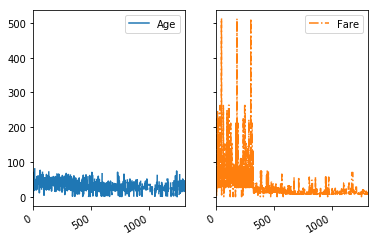

In [59]:
titanic = pd.read_csv("titanic.csv", index_col = None
                      , header = 0, sep = ",")
titanic.plot(y = ["Age", "Fare"], subplots = True, layout = (1,2), 
            sharey = True, style = ['-', '-.'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1233d9470>,
      dtype=object)

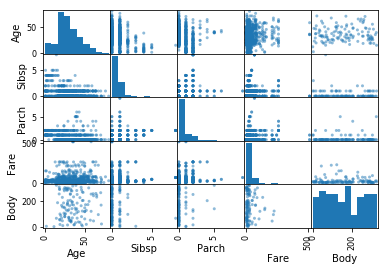

In [62]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(titanic[["Age", "Sibsp", 
            "Parch", "Fare", "Body"]])

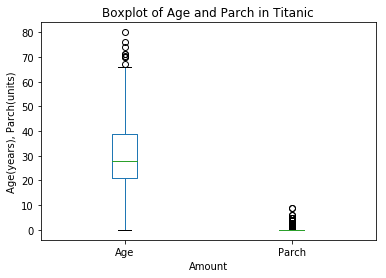

In [72]:
titanic.plot(kind = "box", y = ["Age", "Parch"])
plt.title("Boxplot of Age and Parch in Titanic")
plt.xlabel("Amount")
plt.ylabel("Age(years), Parch(units)")
plt.show()

I got so tired... Above is only one example, but you see how is done... 